In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
data = load_breast_cancer()

X = data.data        # features
y = data.target      # labels (0 = malignant, 1 = benign)

# Optional: convert to DataFrame for better understanding
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = cm.ravel()

error_rate = (FP + FN) / (TP + TN + FP + FN)
false_positive_rate = FP / (FP + TN)
false_negative_rate = FN / (FN + TP)

print("Error Rate:", error_rate)
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

Accuracy: 0.9736842105263158

Confusion Matrix:
 [[41  2]
 [ 1 70]]
Error Rate: 0.02631578947368421
False Positive Rate: 0.046511627906976744
False Negative Rate: 0.014084507042253521


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791


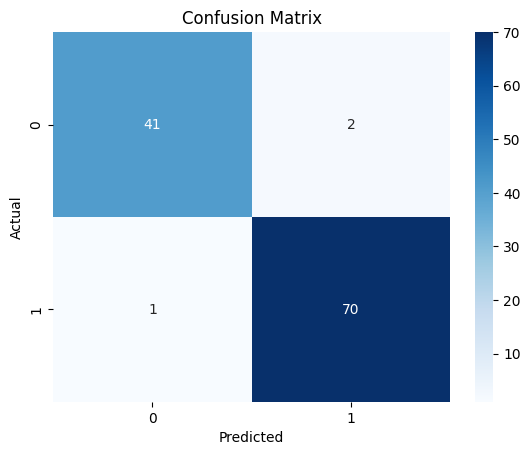

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()